In [1]:
#export
"""Higher order functions"""
__all__ = ["Func", "polyfit", "derivative", "optimize", "inverse", "integral"]
from typing import Callable, List
import k1lib, numpy as np, warnings
from functools import partial
import matplotlib.pyplot as plt

In [2]:
#export
Func = Callable[[float], float]
def polyfit(x:List[float], y:List[float], deg:int=6) -> Func:
    """Returns a function that approximate :math:`f(x) = y`.
Example::

    xs = [1, 2, 3]
    ys = [2, 3, 5]
    f = k1.polyfit(xs, ys, 1)

This will create a best-fit function. You can just use it as a regular,
normal function. You can even pass in :class:`numpy.ndarray`::

    # returns some float
    f(2)

    # plots fit function from 0 to 5
    xs = np.linspace(0, 5)
    plt.plot(xs, f(xs))

:param deg: degree of the polynomial of the returned function"""
    params = np.polyfit(x, y, deg)
    def _inner(_x):
        answer = np.zeros_like(_x, dtype=float)
        for expo, param in enumerate(params):
            answer += param * _x**(len(params)-expo-1)
        return answer
    return _inner

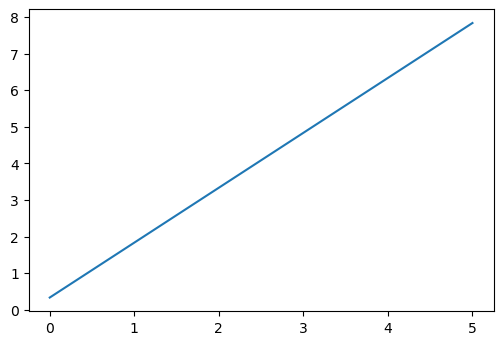

In [3]:
xs = [1, 2, 3]; ys = [2, 3, 5]
f = polyfit(xs, ys, 1)
xs = np.linspace(0, 5)
plt.plot(xs, f(xs));

In [4]:
#export
def derivative(f:Func, delta:float=1e-6) -> Func:
    """Returns the derivative of a function.
Example::

    f = lambda x: x**2
    df = k1lib.derivative(f)
    df(3) # returns roughly 6 """
    return lambda x: (f(x + delta) - f(x)) / delta

In [5]:
f = lambda x: x**2
df = derivative(f)
assert abs(df(3) - 6) < 1e-5

In [6]:
#export
def optimize(f:Func, v:float=1, threshold:float=1e-6, **kwargs) -> float:
    r"""Given :math:`f(x) = 0`, solves for x using Newton's method with initial value
`v`. Example::

    f = lambda x: x**2-2
    # returns 1.4142 (root 2)
    k1lib.optimize(f)
    # returns -1.4142 (negative root 2)
    k1lib.optimize(f, -1)

Interestingly, for some reason, result of this is more accurate than :meth:`derivative`.
"""
    if len(kwargs) > 0: f = partial(f, **kwargs)
    fD = derivative(f)
    for i in range(20):
        v = v - f(v)/fD(v)
    if abs(f(v)) > threshold: warnings.warn("k1lib.optimize not converging")
    return v

In [7]:
f = lambda x: x**2-2
assert abs(optimize(f) - 2**0.5) < 1e-6
assert abs(optimize(f, -1) + 2**0.5) < 1e-6

In [8]:
#export
def inverse(f:Func) -> Func:
    """Returns the inverse of a function.
Example::

    f = lambda x: x**2
    fInv = k1lib.inverse(f)
    # returns roughly 3
    fInv(9)

.. warning::
    The inverse function takes a long time to run, so don't use this
    where you need lots of speed. Also, as you might imagine, the
    inverse function isn't really airtight. Should work well with
    monotonic functions, but all bets are off with other functions."""
    return lambda y: optimize(lambda x: f(x) - y)

In [9]:
f = lambda x: x**2; fInv = inverse(f)
assert abs(fInv(9) - 3) < 1e-6

In [10]:
#export
def integral(f:Func, _range:k1lib.Range) -> float:
    """Integrates a function over a range.
Example::

    f = lambda x: x**2
    # returns roughly 9
    k1lib.integral(f, [0, 3])

There is also the cli :class:`~k1lib.cli.modifier.integrate`
which has a slightly different api."""
    _range = k1lib.Range(_range)
    n = 1000; xs = np.linspace(*_range, n)
    return sum([f(x)*_range.delta/n for x in xs])

In [11]:
assert abs(integral(f, [0, 3]) - 9) < 1e-2

In [12]:
!../export.py _higher

Current dir: /home/kelvin/repos/labs/k1lib, ../export.py
rm: cannot remove '__pycache__': No such file or directory
Found existing installation: k1lib 1.0
Uninstalling k1lib-1.0:
  Successfully uninstalled k1lib-1.0
running install
/home/kelvin/anaconda3/envs/torch/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/home/kelvin/anaconda3/envs/torch/lib/python3.8/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating k1lib.egg-info
writing k1lib.egg-info/PKG-INFO
writing dependency_links to k1lib.egg-info/dependency_links.txt
writing requirements to k1lib.egg-info/requires.txt
writing top-level names to k1lib.egg-info/top_level.txt
writing manifest file 'k1lib.egg-info/SOUR